In [61]:
import pandas as pd
import numpy as np
import gymnasium as gym
from gymnasium.wrappers import FlattenObservation
from gymnasium.envs.toy_text.frozen_lake import generate_random_map
import pygame
from algorithms.rl import RL
from examples.test_env import TestEnv
from algorithms.planner import Planner
import itertools
import os
import matplotlib.pyplot as plt
import math
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import warnings

# grid search
# from examples.grid_search import GridSearch

In [2]:
class Plots:
    @staticmethod
    def grid_world_policy_plot(data, label):
        if not math.modf(math.sqrt(len(data)))[0] == 0.0:
            warnings.warn("Grid map expected.  Check data length")
        else:
            grid = int(math.sqrt(np.array(data).shape[0]))
            data = np.around(np.array(data).reshape((grid, grid)), 2)
            df = pd.DataFrame(data=data)
            my_colors = ((0.0, 0.0, 0.0, 1.0), (0.8, 0.0, 0.0, 1.0), (0.0, 0.8, 0.0, 1.0), (0.0, 0.0, 0.8, 1.0))
            cmap = LinearSegmentedColormap.from_list('Custom', my_colors, len(my_colors))
            ax = sns.heatmap(df, cmap=cmap, linewidths=1.0)
            colorbar = ax.collections[0].colorbar
            colorbar.set_ticks([.4, 1.1, 1.9, 2.6])
            colorbar.set_ticklabels(['Left', 'Down', 'Right', 'Up'])
            plt.title(label)
            plt.show()

    @staticmethod
    def grid_values_heat_map(data, label, ax=None):
        if not math.modf(math.sqrt(len(data)))[0] == 0.0:
            warnings.warn("Grid map expected.  Check data length")
        else:
            grid = int(math.sqrt(np.array(data).shape[0]))
            data = np.around(np.array(data).reshape((grid, grid)), 2)
            df = pd.DataFrame(data=data)
            sns.heatmap(df, annot=True, ax=ax).set_title(label)
            plt.show()

    @staticmethod
    def v_iters_plot(data, label,ax=None):
        df = pd.DataFrame(data=data)
        df.columns = [label]
        sns.set_theme(style = "whitegrid")
        title = label + " per Iterations"
        sns.lineplot(x=df.index, y=label, data=df, ax=None).set_title(title)
        plt.show()

## Value Iteration

In [152]:
frozen_lake = gym.make('FrozenLake-v1', desc=generate_random_map(size=32))

c:\Users\lboad\py_venv\rl\lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.P to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.P` for environment variables or `env.get_wrapper_attr('P')` that will search the reminding wrappers.
  logger.warn(


runtime = 2.85 seconds


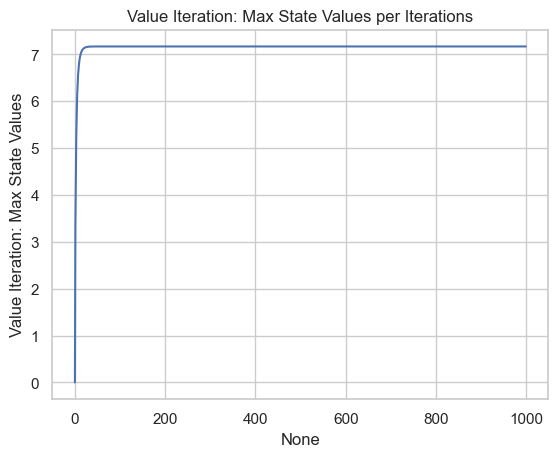

In [153]:
# VI/PI v_iters_plot
V, V_track, pi, conv_track = Planner(frozen_lake.env.P).value_iteration(gamma=0.9)
max_value_per_iter = np.amax(V_track, axis=1)
Plots.v_iters_plot(max_value_per_iter, "Value Iteration: Max State Values")
plt.show()

In [154]:
test_scores = TestEnv.test_env(env=frozen_lake.env, render=False, user_input=False, pi=pi)
print(test_scores.mean())

5.93427734375


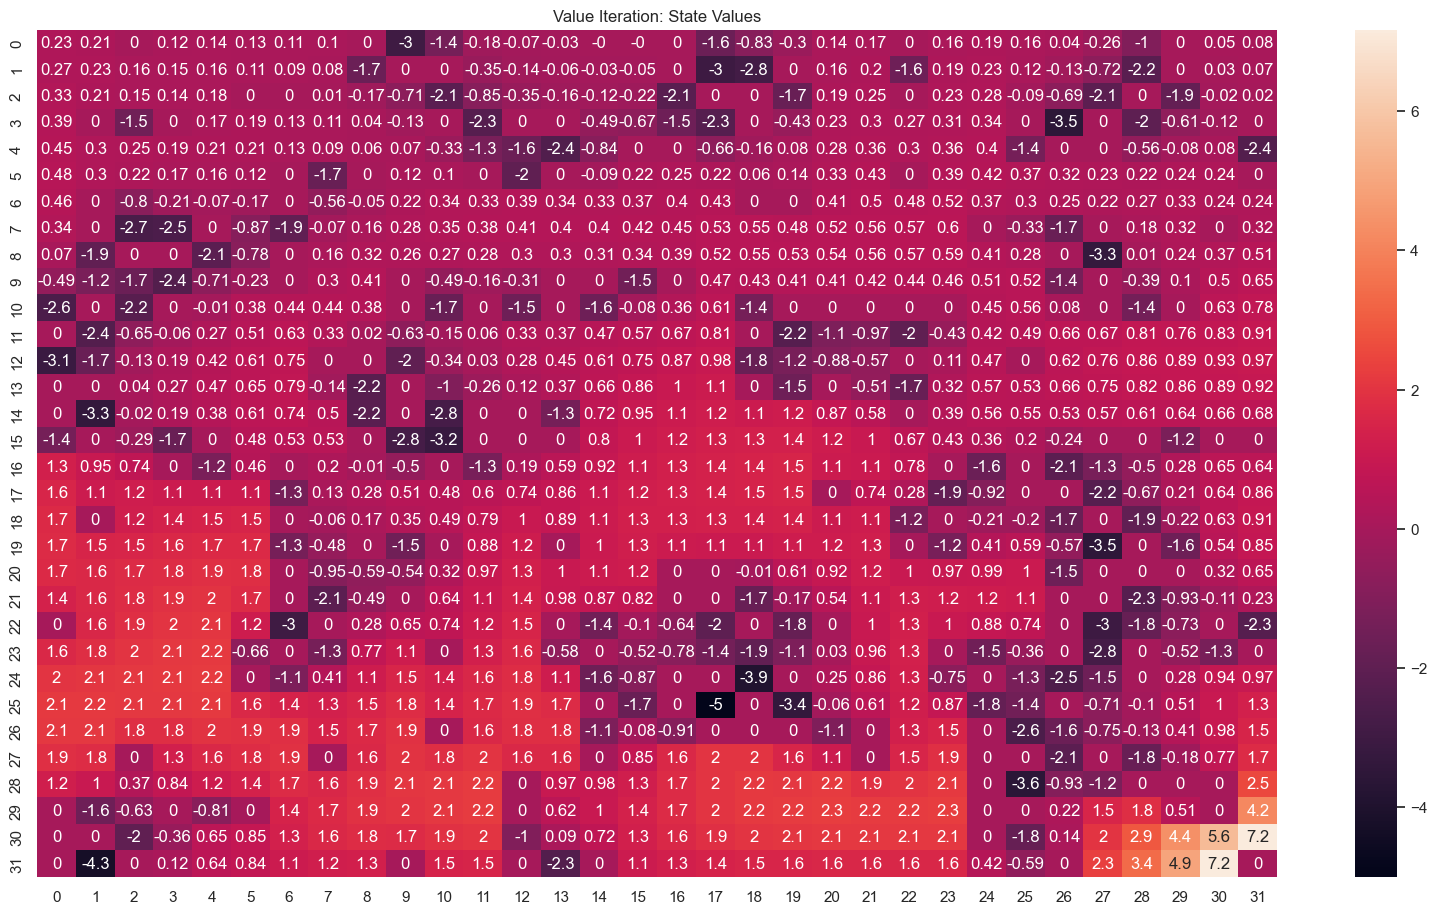

In [155]:
fig, ax = plt.subplots(figsize=(20,11))
Plots.grid_values_heat_map(V, "Value Iteration: State Values", ax=ax)

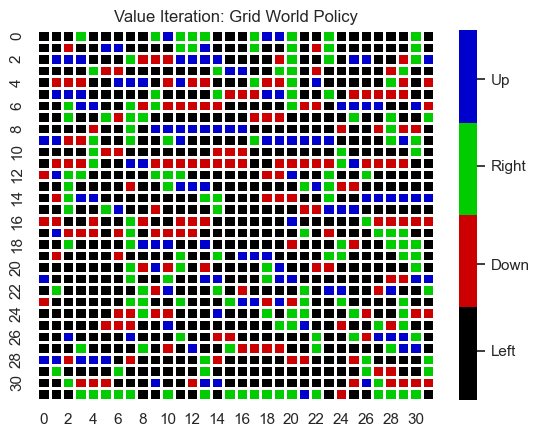

In [156]:
# VI/PI grid_world_policy_plot
n_states = frozen_lake.env.observation_space.n
new_pi = list(map(lambda x: pi(x), range(n_states)))
s = int(math.sqrt(n_states))
Plots.grid_world_policy_plot(np.array(new_pi), "Value Iteration: Grid World Policy")

## Policy Iteration

c:\Users\lboad\py_venv\rl\lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.P to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.P` for environment variables or `env.get_wrapper_attr('P')` that will search the reminding wrappers.
  logger.warn(
c:\Users\lboad\py_venv\rl\lib\site-packages\algorithms\planner.py:148: UserWarning: Max iterations reached before convergence.  Check n_iters.
  warnings.warn("Max iterations reached before convergence.  Check n_iters.")


runtime = 214.11 seconds


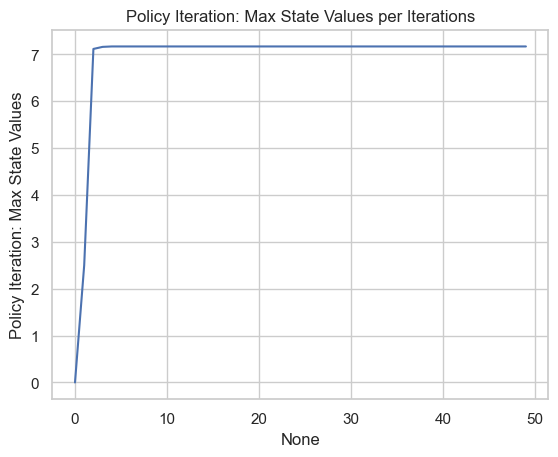

In [157]:
# frozen_lake = gym.make('FrozenLake-v1', desc=generate_random_map(size=32))
# VI/PI v_iters_plot
V, V_track, pi, conv_track = Planner(frozen_lake.env.P).policy_iteration(gamma=0.9)
max_value_per_iter = np.amax(V_track, axis=1)
Plots.v_iters_plot(max_value_per_iter, "Policy Iteration: Max State Values")
plt.show()

In [158]:
test_scores = TestEnv.test_env(env=frozen_lake.env, render=False, user_input=False, pi=pi)
print(test_scores.mean())

11.9126953125


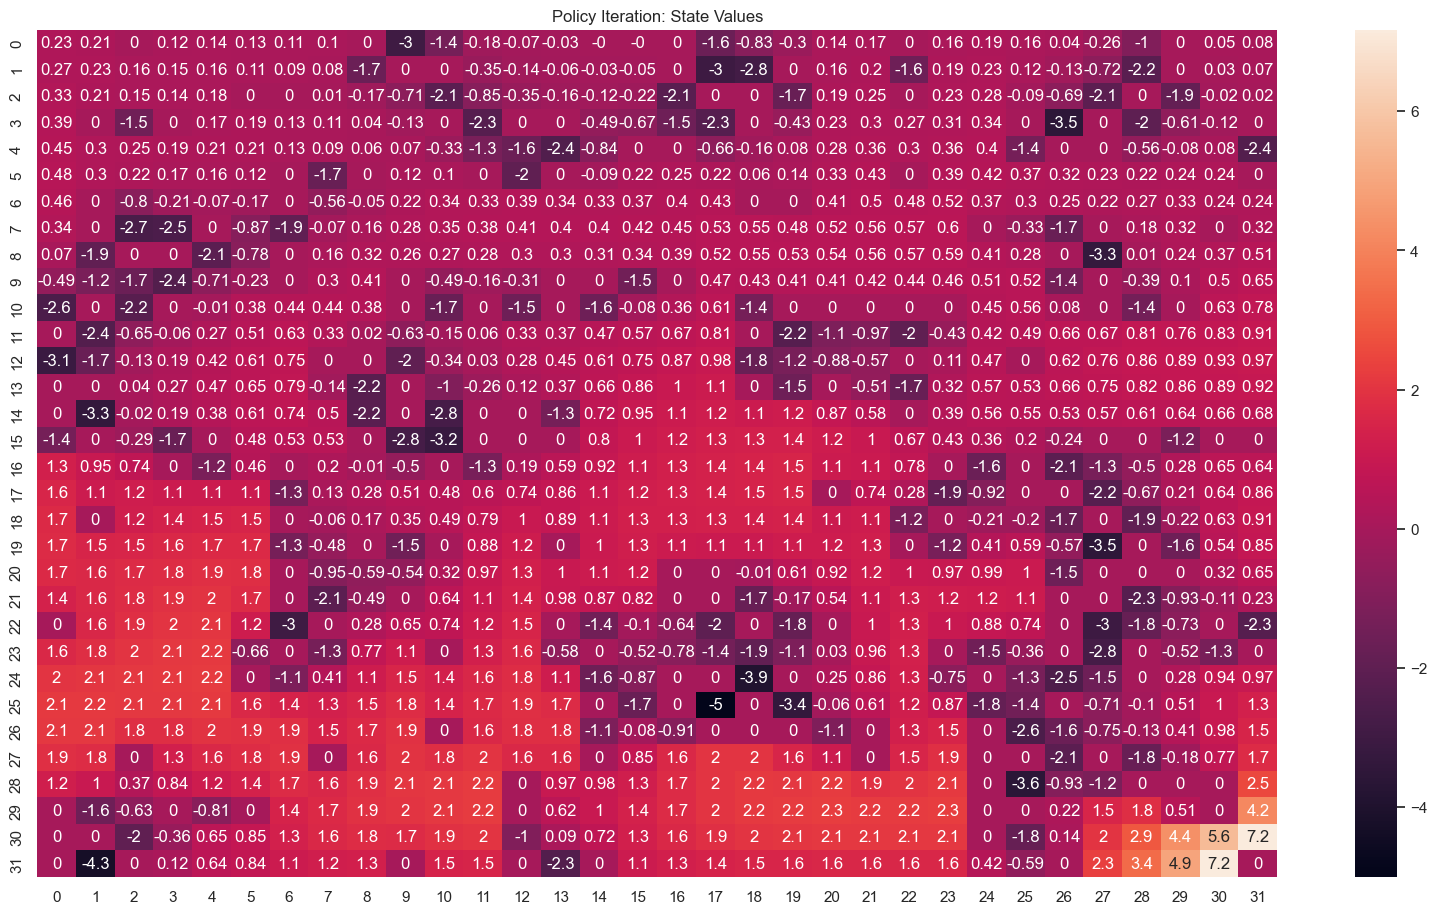

In [159]:
fig, ax = plt.subplots(figsize=(20,11))
Plots.grid_values_heat_map(V, "Policy Iteration: State Values", ax=ax)

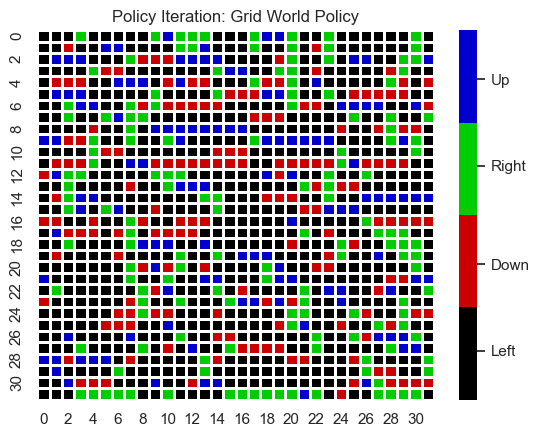

In [160]:
# VI/PI grid_world_policy_plot
n_states = frozen_lake.env.observation_space.n
new_pi = list(map(lambda x: pi(x), range(n_states)))
s = int(math.sqrt(n_states))
Plots.grid_world_policy_plot(np.array(new_pi), "Policy Iteration: Grid World Policy")

## Q-Learning

  0%|          | 0/50000 [00:00<?, ?it/s]

runtime = 20.53 seconds


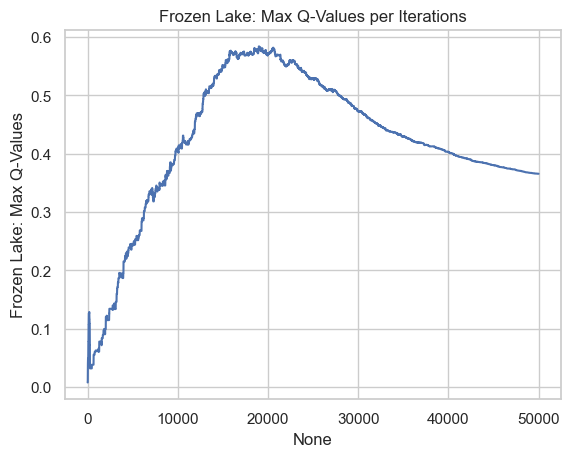

In [120]:
# alphas affects how much q-values change based on reward every episode
# epsilon decides how often the agent will choose a random action (the probability 1-epsilon)
# gamma decides the impact of future rewards on current q-values.
# Low favors current rewards, high favors future rewards
# frozen_lake = gym.make('FrozenLake-v1', desc=generate_random_map(size=20))
# Q-learning v_iters_plot
Q, V, pi, Q_track, pi_track = RL(frozen_lake.env).q_learning(gamma=1,min_epsilon=0.35,
                                                             alpha_decay_ratio=1, init_alpha=0.15, min_alpha=0.001, n_episodes=50_000)
max_q_value_per_iter = np.amax(np.amax(Q_track, axis=2), axis=1)
Plots.v_iters_plot(max_q_value_per_iter, "Q-Learning: Max Q-Values")

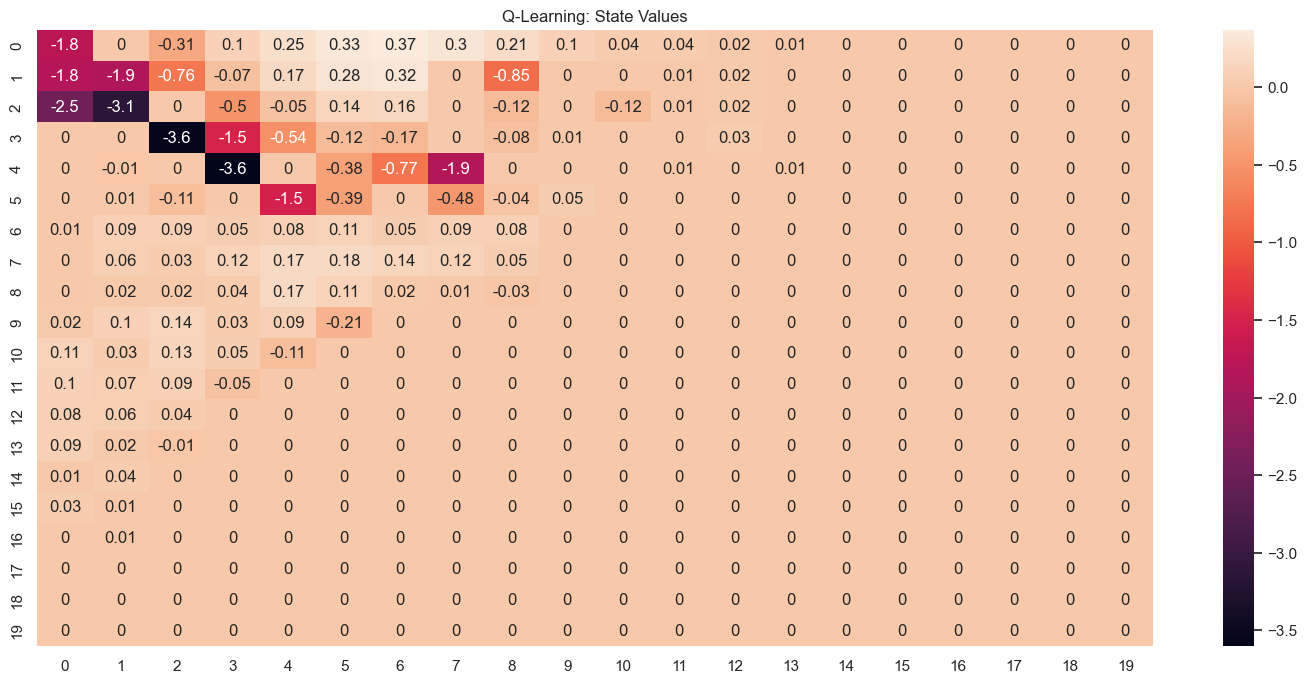

In [121]:
fig, ax = plt.subplots(figsize=(18,8))
Plots.grid_values_heat_map(V, "Q-Learning: State Values", ax=ax)

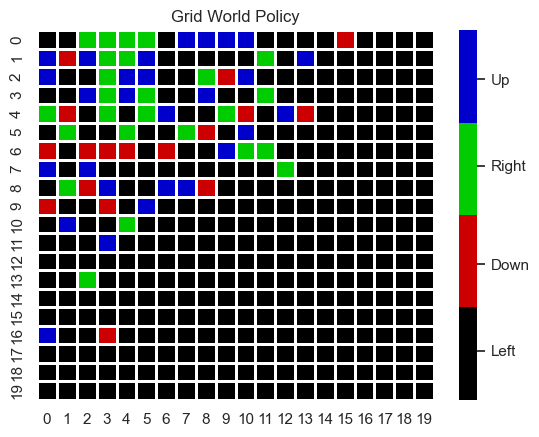

In [122]:
# Q-learning grid_world_policy_plot
n_states = frozen_lake.env.observation_space.n
new_pi = list(map(lambda x: pi(x), range(n_states)))
s = int(math.sqrt(n_states))
Plots.grid_world_policy_plot(np.array(new_pi), "Q-Learning: Grid World Policy")

In [149]:
test_scores = TestEnv.test_env(env=frozen_lake.env, render=False, user_input=False, pi=pi)
print(test_scores.mean())

c:\Users\lboad\py_venv\rl\lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


KeyboardInterrupt: 

In [ ]:
pi_track[-1]

In [ ]:
pi_track[0].shape

In [ ]:
Q_track.shape

In [ ]:
plt.plot(Q_track.mean(axis=2).mean(1))

In [ ]:
Q_track.mean(axis=1).mean(1)

## Q-Learning Grid Search

In [ ]:
def value_policy_iteration_plot(ax=None, gamma = [0.1, 0.3, 0.5, 0.7, 0.9, 1]):
    
    frozen_lake = gym.make('FrozenLake-v1', desc=generate_random_map(size=32))
    for val in gamma:
        # VI/PI v_iters_plot
        V, V_track, pi, conv_track = Planner(frozen_lake.env.P).value_iteration(gamma=0.9)
        max_value_per_iter = np.amax(V_track, axis=1)
        Plots.v_iters_plot(max_value_per_iter, "Frozen Lake: Max State Values")
    # plt.show()

    return ax

In [144]:
def Q_learning_grid_search(env, lst):
    
    max_q_track = []
    reward_track = []
    gamma_track = []
    epsilon_track = []
    init_alpha = []
    sd_reward = []
    
    for i in lst:
        print("running q-learn -- with min_epsilon: ", i[0],  " gamma: ", i[1], " alpha ", i[2])
        frozen_lake = gym.make('FrozenLake-v1', desc=generate_random_map(size=32))
        Q, V, pi, Q_track, pi_track = RL(env).q_learning(min_epsilon=i[0], gamma=i[1],
                                                          n_episodes=40_000, init_alpha=i[2], alpha_decay_ratio=1)
        max_q_value_per_iter = np.amax(np.amax(Q_track, axis=2), axis=1)[-1]
        mean_reward = []
        for _ in range(5):
            test_scores = TestEnv.test_env(env=frozen_lake.env, render=False, user_input=False, pi=pi)
            mean_reward.append(test_scores)
            
        mean_reward = np.array(mean_reward)
        epsilon_track.append(i[0])
        gamma_track.append(i[1])
        reward_track.append(mean_reward.mean())
        sd_reward.append(mean_reward.std())
        max_q_track.append(max_q_value_per_iter)
        init_alpha.append(i[2])
    
    grid_df = pd.DataFrame({
        'gamma': gamma_track,
        'epsilon': epsilon_track,
        'alpha': init_alpha, 
        'mean_reward': reward_track,
        'sd_reward':sd_reward,
        'max_q': max_q_track,
    })

    return grid_df

In [148]:
gamma = [0.1, 0.3, 0.5, 0.7, 0.9, 1]
min_epsilon = [0.15, 0.25, 0.35, 0.5]
init_alpha = [0.2, 0.15, 0.1, 0.05]
iter_lst = list(itertools.product(gamma, min_epsilon,init_alpha))
grid_results = Q_learning_grid_search(frozen_lake.env, iter_lst)

running q-learn -- with min_epsilon:  0.1  gamma:  0.15  alpha  0.2


runtime = 37.75 seconds
running q-learn -- with min_epsilon:  0.1  gamma:  0.15  alpha  0.15


runtime = 35.84 seconds
running q-learn -- with min_epsilon:  0.1  gamma:  0.15  alpha  0.1


runtime = 41.38 seconds
running q-learn -- with min_epsilon:  0.1  gamma:  0.15  alpha  0.05


runtime = 37.42 seconds


KeyError: 416

In [146]:
grid_results

,gamma,epsilon,alpha,mean_reward,sd_reward,max_q


In [119]:
gamma = [0.1, 0.3, 0.5, 0.7, 0.9, 1]
min_epsilon = [0.15, 0.25, 0.35, 0.5]
init_alpha = [0.2, 0.15, 0.1, 0.05]
list(itertools.product(gamma, min_epsilon,init_alpha))

[(0.1, 0.15, 0.2),
 (0.1, 0.15, 0.15),
 (0.1, 0.15, 0.1),
 (0.1, 0.15, 0.05),
 (0.1, 0.25, 0.2),
 (0.1, 0.25, 0.15),
 (0.1, 0.25, 0.1),
 (0.1, 0.25, 0.05),
 (0.1, 0.35, 0.2),
 (0.1, 0.35, 0.15),
 (0.1, 0.35, 0.1),
 (0.1, 0.35, 0.05),
 (0.1, 0.5, 0.2),
 (0.1, 0.5, 0.15),
 (0.1, 0.5, 0.1),
 (0.1, 0.5, 0.05),
 (0.3, 0.15, 0.2),
 (0.3, 0.15, 0.15),
 (0.3, 0.15, 0.1),
 (0.3, 0.15, 0.05),
 (0.3, 0.25, 0.2),
 (0.3, 0.25, 0.15),
 (0.3, 0.25, 0.1),
 (0.3, 0.25, 0.05),
 (0.3, 0.35, 0.2),
 (0.3, 0.35, 0.15),
 (0.3, 0.35, 0.1),
 (0.3, 0.35, 0.05),
 (0.3, 0.5, 0.2),
 (0.3, 0.5, 0.15),
 (0.3, 0.5, 0.1),
 (0.3, 0.5, 0.05),
 (0.5, 0.15, 0.2),
 (0.5, 0.15, 0.15),
 (0.5, 0.15, 0.1),
 (0.5, 0.15, 0.05),
 (0.5, 0.25, 0.2),
 (0.5, 0.25, 0.15),
 (0.5, 0.25, 0.1),
 (0.5, 0.25, 0.05),
 (0.5, 0.35, 0.2),
 (0.5, 0.35, 0.15),
 (0.5, 0.35, 0.1),
 (0.5, 0.35, 0.05),
 (0.5, 0.5, 0.2),
 (0.5, 0.5, 0.15),
 (0.5, 0.5, 0.1),
 (0.5, 0.5, 0.05),
 (0.7, 0.15, 0.2),
 (0.7, 0.15, 0.15),
 (0.7, 0.15, 0.1),
 (0.7, 0.15, 0.05)